

## **Time Series Analysis Individual Project ( Mohamed Oussama OULD ROUIS , Group 5)**


# **Time Series Analysis of Monthly Occupancy Rates (1999-2011)**





## **Abstract**
This study analyzes monthly train occupancy rates from 1999 to 2011 using Seasonal Autoregressive Integrated Moving Average (SARIMA) models. The analysis aimed to understand patterns in train occupancy and develop an accurate forecasting model. Initial examination of the data revealed strong seasonal patterns and non-stationarity, necessitating both regular and seasonal differencing.

After testing various SARIMA specifications, a SARIMA(1,1,1)(0,1,2)[12] model was selected based on ACF and PACF analysis. Model diagnostics confirmed the adequacy of the fit, with residuals showing:


*   Normal distribution (validated through Q-Q plots and histograms)
*   No significant autocorrelation (confirmed by Ljung-Box tests with p-values > 0.05)
*   Homoscedastic behavior (evident in residual plots)






The model's forecasting performance was evaluated using a holdout sample of the last two years (2010-2011). The results demonstrated excellent predictive accuracy with a Mean Absolute Percentage Error (MAPE) of 1.43% on the test set, and a Theil's U statistic of 0.137, indicating superior performance compared to naive forecasting methods.
This model provides a reliable tool for predicting train occupancy rates, which could be valuable for capacity planning and resource allocation in railway operations.

Installing Required Packages

## **Introduction**
Train occupancy rates serve as a crucial metric in railway transportation systems, providing valuable insights into system efficiency, passenger behavior, and capacity utilization. This study examines monthly train occupancy data spanning from 1999 to 2011, a period marked by significant changes in transportation patterns and economic conditions.

Understanding and forecasting train occupancy rates is vital for several reasons. First, it helps railway operators optimize their resource allocation, ensuring that train capacity matches passenger demand across different seasons and periods. Second, accurate predictions of occupancy rates enable better planning for maintenance schedules and service adjustments. Third, this information is valuable for long-term infrastructure planning and investment decisions in the railway sector.

The dataset captures monthly fluctuations in train occupancy over twelve years, revealing patterns that reflect both seasonal travel behaviors and longer-term trends in public transportation usage. These patterns are influenced by various factors, including holiday seasons, academic calendars, and economic cycles. By analyzing this historical data, we aim to develop a reliable forecasting model that can help railway operators anticipate future occupancy levels and make informed operational decisions.

This study employs time series analysis techniques, specifically SARIMA models, to understand the underlying patterns in the data and generate accurate forecasts. The results of this analysis can provide valuable insights for transportation planners, railway operators, and policymakers in optimizing train services and improving overall system efficiency.

In [ ]:
if (!requireNamespace("forecast", quietly = TRUE)) install.packages("forecast")
if (!requireNamespace("tseries", quietly = TRUE)) install.packages("tseries")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("stats", quietly = TRUE)) install.packages("stats")
if (!requireNamespace("lmtest", quietly = TRUE)) install.packages("lmtest")


In [ ]:
library(forecast)
library(tseries)
library(tidyverse)
library(stats)
library(lmtest)


Loading the dataset

In [ ]:
# Read data from GitHub
url <- "https://raw.githubusercontent.com/OussamaOR/train-occupancy-analysis/refs/heads/main/Occupancy_train.csv"
occupancy_data <- read.csv(url)


Create a time series object from the data

## **Model specification**

In [ ]:
occupancy_ts <- ts(occupancy_data$Total.Occupancy.rate..percent.,
                   start = c(1999, 1),     # Specifies the starting year and month (January 1999)
                   frequency = 12)          # Sets the frequency to 12 (monthly data)

# This time series object (occupancy_ts) will be used for time series analysis,
# allowing for seasonal decomposition, trend analysis, and forecasting.

Plotting the data

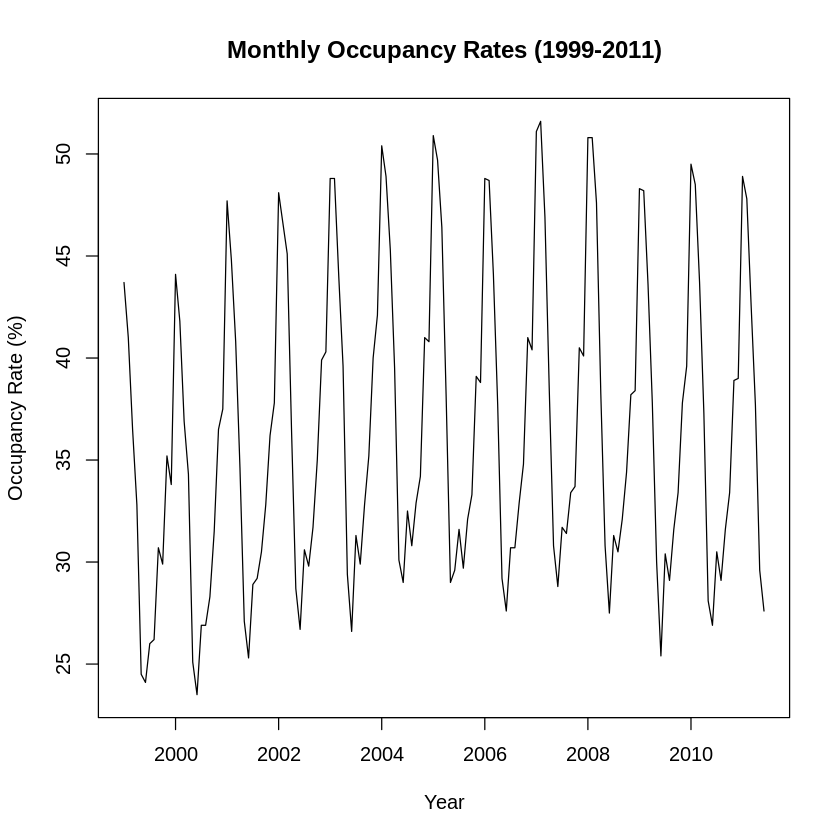

In [ ]:
plot(occupancy_ts,
     main = "Monthly Occupancy Rates (1999-2011)",
     ylab = "Occupancy Rate (%)",
     xlab = "Year")

# **Context Analysis of Train Occupancy Data :**

The monthly occupancy rates data from 1999 to 2011 reveals several meaningful patterns and insights relevant to railway operations and transportation planning:

**Data Characteristics and Patterns:**

Occupancy rates fluctuate between approximately 25% and 52%
Clear seasonal pattern with regular peaks and troughs throughout each year
Consistent seasonal behavior maintained over the 12-year period
**Contextual Interpretation:**

**Seasonal Patterns:**

Highest occupancy rates occur during autumn and winter months (October-February)

This likely corresponds to :
- academic terms/semesters
- Holiday season travel (Christmas and New Year)
- Business travel during peak working months
- Lower rates during summer months (June-August)
- Coincides with academic holidays
- Reduced business travel during vacation season
- Mid-level occupancy during spring months

**Educational and Business Impact:**

- The strong correlation with academic calendar suggests:
- Significant student ridership
- University terms heavily influence occupancy patterns
- Winter peaks indicate:
- Combined effect of student travel and holiday season
- Business travel during active months
- Weather conditions possibly favoring rail transport

**Operational Significance:**

The consistent seasonal patterns allow for:

- Strategic capacity planning for academic year
- Efficient resource allocation during peak winter months
- Maintenance scheduling during summer lows
- The 25-52% occupancy range suggests:
- Room for capacity optimization during off-peak periods
- Need for increased capacity during academic terms


**Initial Observations**


*   **Strong Seasonality**: The data exhibits a clear seasonal pattern with a period of 12 months. This is evident from the regular peaks and troughs that repeat annually.


*   **Slight Upward Trend**:There appears to be a slight upward trend in the overall occupancy rates over the years, though it's not dramatic.


*   **Consistent Pattern**: The seasonal pattern remains fairly consistent throughout the time period, with higher occupancy rates typically occurring in winter months and lower rates in summer months.


Data statistics

In [ ]:
summary_stats <- summary(occupancy_ts)
print(summary_stats)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.50   30.43   34.70   36.31   41.00   51.60 


**Data Transformation and Stationarity Testing**

Box-Cox Transformation

In [ ]:
bc_transformation <- BoxCox.lambda(occupancy_ts)
occupancy_transformed <- BoxCox(occupancy_ts, bc_transformation)

In [ ]:
print(paste("Box-Cox Lambda:", bc_transformation))

[1] "Box-Cox Lambda: 0.14771381821158"


Despite λ being close to 0, we decided to apply the transformation to improve the normality of the data and stabilize variance as much as possible.

Plotting the data after Box-Cox Transfromation

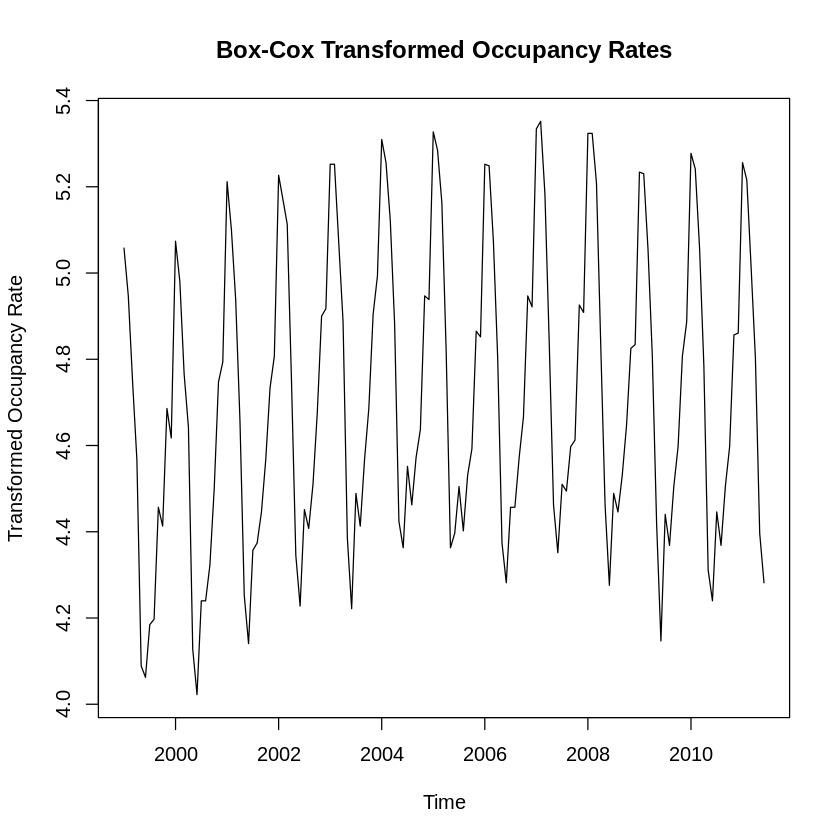

In [ ]:
plot(occupancy_transformed,
     main = "Box-Cox Transformed Occupancy Rates",
     ylab = "Transformed Occupancy Rate")

Seasonal Differencing

In [ ]:
occupancy_seasonal_diff <- diff(occupancy_transformed, lag=12)

**Testing for Stationarity**

Dickey-Fuller Test

In [ ]:
adf_test <- adf.test(occupancy_seasonal_diff)
print("Augmented Dickey-Fuller Test Results:")
print(adf_test)

[1] "Augmented Dickey-Fuller Test Results:"

	Augmented Dickey-Fuller Test

data:  occupancy_seasonal_diff
Dickey-Fuller = -3.0046, Lag order = 5, p-value = 0.1585
alternative hypothesis: stationary



Since p-value > 0.05, we failed to reject the null hypothesis of non-stationarity

**Conclusion**: The transformed series is still not stationary

we have to do further transformations

Regular First Differences

In [ ]:
occupancy_diff_both <- diff(occupancy_seasonal_diff, lag=1)

After seasonal differencing, we applied first-order differencing to remove the remaining linear trend

Dickey-Fuller Test

In [ ]:
adf_both_diff <- adf.test(occupancy_diff_both)
print("ADF Test after Seasonal and Regular Differencing:")
print(adf_both_diff)

Warning message in adf.test(occupancy_diff_both):
“p-value smaller than printed p-value”


[1] "ADF Test after Seasonal and Regular Differencing:"

	Augmented Dickey-Fuller Test

data:  occupancy_diff_both
Dickey-Fuller = -7.3965, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



Since p-value < 0.05, we rejected the null hypothesis of non-stationarity

**Conclusion**: The differenced series is now stationary

**Model Identification**

Based on our analysis of the data characteristics:
The need for first-order differencing (d=1) to achieve stationarity.


The need for seasonal differencing (D=1) to remove seasonality.

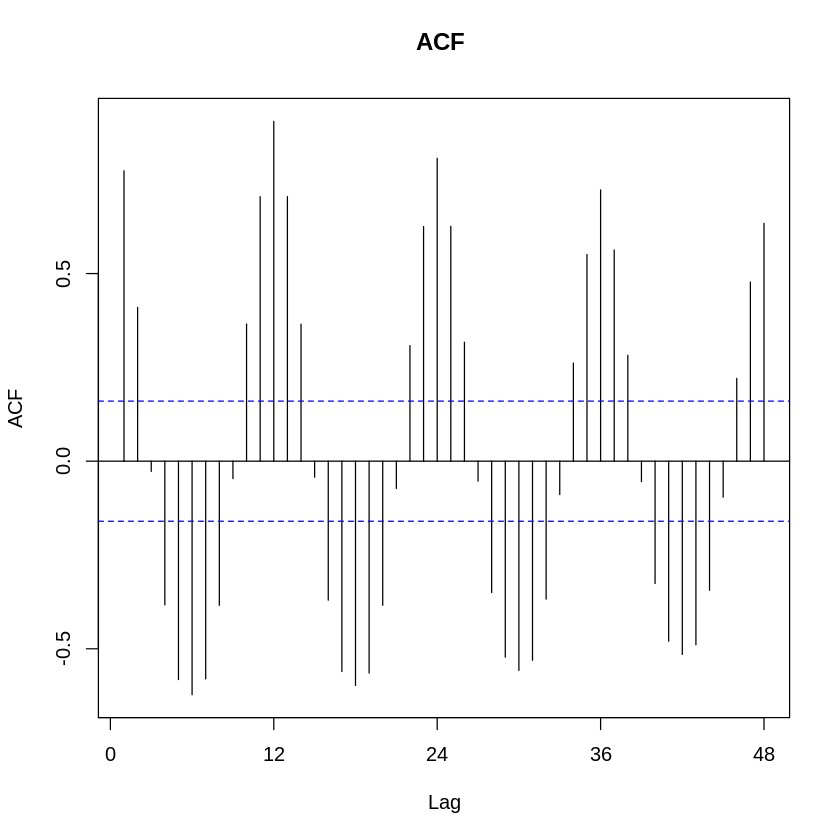

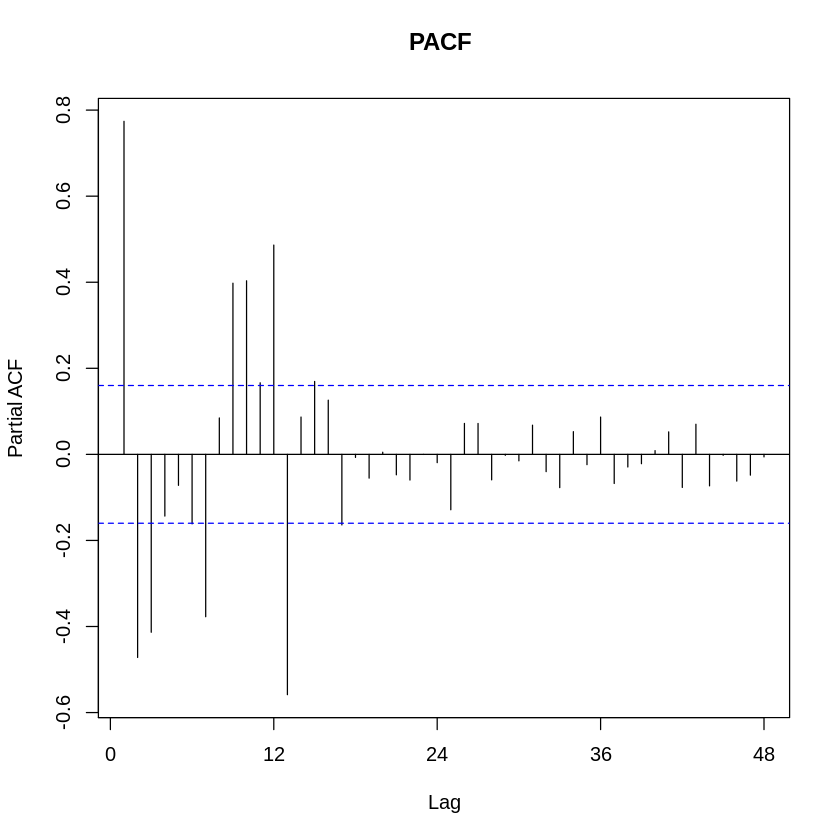

In [ ]:
par(mfrow=c(1,1))
Acf(occupancy_ts, main="ACF ", lag.max=48)
Pacf(occupancy_ts, main="PACF ", lag.max=48)

Since the CF decays gradually with sinusoidal pattern we can think of multiplicative SARIMA model

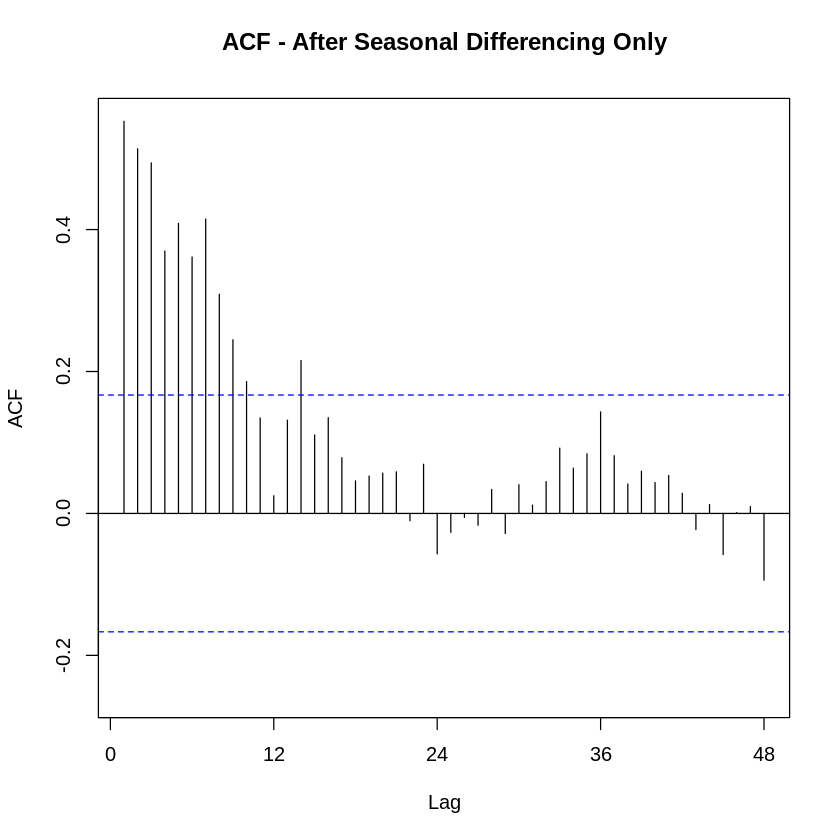

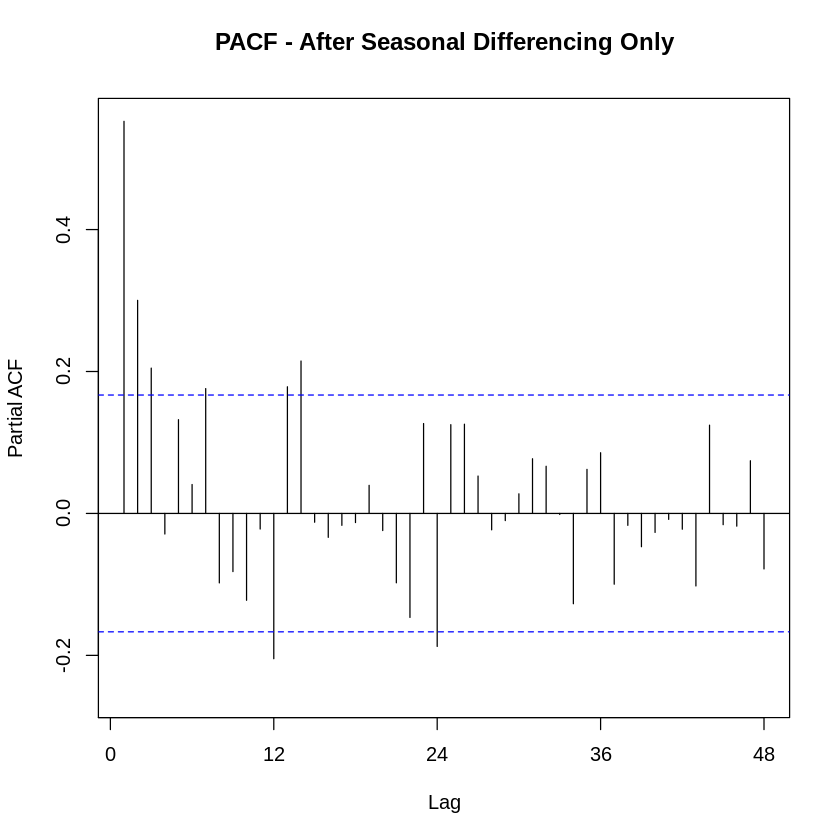

In [ ]:
par(mfrow=c(1,1))
Acf(occupancy_seasonal_diff, main="ACF - After Seasonal Differencing Only", lag.max=48)
Pacf(occupancy_seasonal_diff, main="PACF - After Seasonal Differencing Only", lag.max=48)

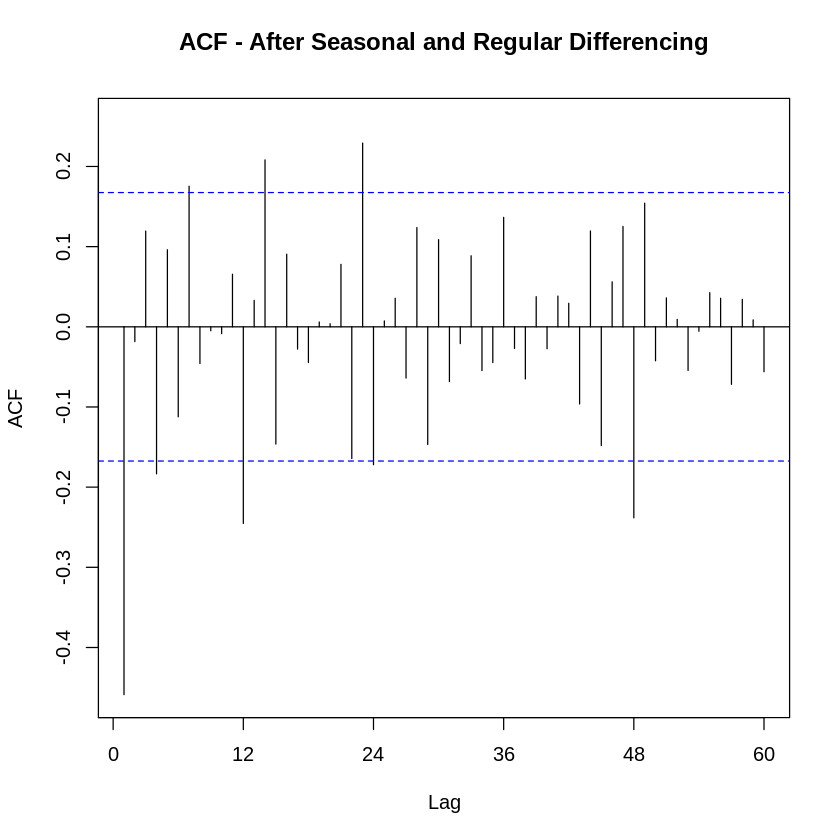

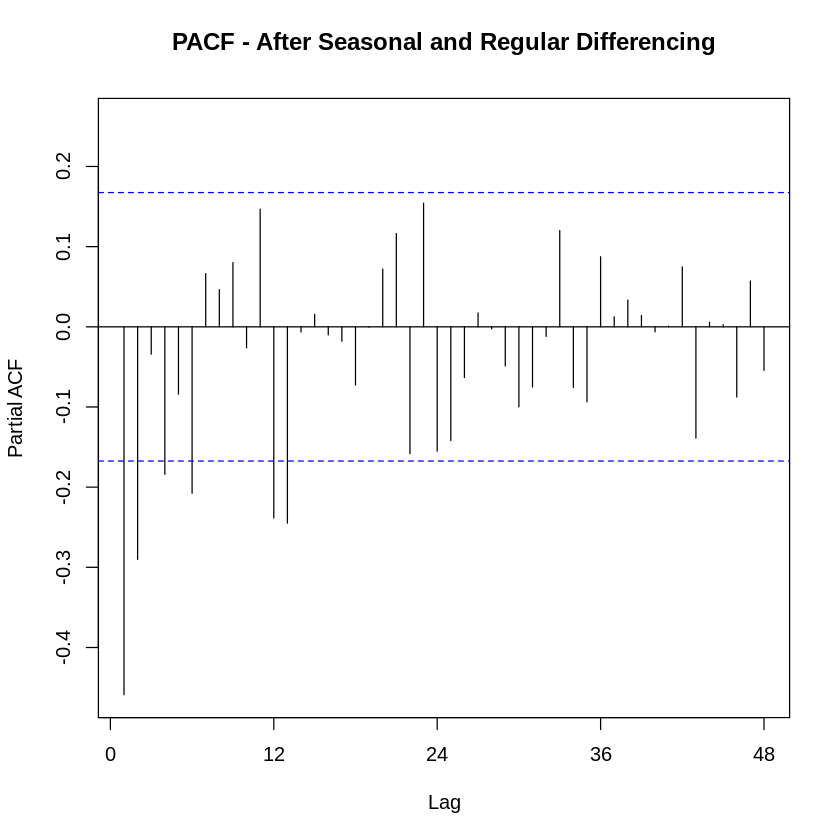

In [ ]:
par(mfrow=c(1,1))
Acf(occupancy_diff_both, main="ACF - After Seasonal and Regular Differencing", lag.max=60)
Pacf(occupancy_diff_both, main="PACF - After Seasonal and Regular Differencing", lag.max=48)

**For the non-seasonal part (p,d,q):**
d = 1 (first order differencing)
ACF: Shows a significant spike at lag = 1  (q = 1) , we can ignore other values that are outside of the Confidence Interval

PACF: Shows significant spike at lag = 1    (p = 1) and another decent spike at lag = 2 (p = 2) , ( we can ignore the second spike to have a simpler model)

**For the seasonal part (P,D,Q)s:**
ACF: We can identify seasonal spikes in ACF (lag = 12 , lag = 24 , lag = 48) , However we can ignore the spike at lag = 48 to have a simpler model or we can take it in consideration and have a bit or error since there is no spike at
lag = 36 . we can then take Q = 2 or Q = 4.   
PACF: We identify seasonal spike at lag = 12 , then we can take P = 1
- we can also ignore it and take P = 0 to have a simpler model.
(P = 0 and Q = 2)


D = 1 (seasonal differencing)


Based on these observations, we can suggest the following models :

SARIMA(1,1,1)(0,1,0)[12] - Most basic model

SARIMA(1,1,1)(0,1,2)[12] - Adding seasonal MA

SARIMA(2,1,1)(0,1,2)[12] - Adding second AR term

SARIMA(1,1,1)(1,1,2)[12] - Adding seasonal AR

SARIMA(2,1,1)(1,1,2)[12] - More complex model

SARIMA(2,1,1)(0,1,4)[12] - With longer seasonal MA


Tuning The Parameters ( Finding the best model using BIC and AIC)

In [ ]:
evaluate_sarima_models <- function(data) {
    models <- list(
        model1 = list(order=c(1,1,1), seasonal=list(order=c(0,1,0), period=12)),
        model2 = list(order=c(1,1,1), seasonal=list(order=c(0,1,2), period=12)),
        model3 = list(order=c(2,1,1), seasonal=list(order=c(0,1,2), period=12)),
        model4 = list(order=c(1,1,1), seasonal=list(order=c(1,1,2), period=12)),
        model5 = list(order=c(2,1,1), seasonal=list(order=c(1,1,2), period=12)),
        model6 = list(order=c(2,1,1), seasonal=list(order=c(0,1,4), period=12))
    )

    results <- data.frame(
        model = character(),
        AIC = numeric(),
        BIC = numeric(),
        stringsAsFactors = FALSE
    )

    # Fit each model and collect metrics
    for(i in seq_along(models)) {
        tryCatch({
            # Fit the model
            fit <- Arima(data,
                        order = models[[i]]$order,
                        seasonal = models[[i]]$seasonal)

            # Store results
            results <- rbind(results, data.frame(
                model = names(models)[i],
                AIC = fit$aic,
                BIC = fit$bic
            ))

            cat(sprintf("Fitted model %s\n", names(models)[i]))
        }, error = function(e) {
            cat(sprintf("Error fitting model %s: %s\n", names(models)[i], e$message))
        })
    }

    # Find best models
    best_aic <- results[which.min(results$AIC), ]
    best_bic <- results[which.min(results$BIC), ]

    cat("\nAll models summary:\n")
    print(results)

    cat("\nBest model by AIC:\n")
    print(best_aic)

    cat("\nBest model by BIC:\n")
    print(best_bic)

    return(results)
}

results <- evaluate_sarima_models(occupancy_ts)



Fitted model model1
Fitted model model2
Fitted model model3
Fitted model model4
Fitted model model5
Fitted model model6

All models summary:
   model      AIC      BIC
1 model1 440.2164 448.9763
2 model2 414.4426 429.0425
3 model3 415.1336 432.6534
4 model4 415.2476 432.7675
5 model5 416.0798 436.5197
6 model6 414.3414 437.7012

Best model by AIC:
   model      AIC      BIC
6 model6 414.3414 437.7012

Best model by BIC:
   model      AIC      BIC
2 model2 414.4426 429.0425


We can conclude that the best model that we can identify is :
 **SARIMA(1,1,1)(0,1,2)[12]**

 Though, it can happen that there exist a better SARIMA model,
 In fact auto.arima() function suggests the **SARIMA(0,1,1)(0,1,2)[12]** model.

We proceed by studying the diagnostics of the model **SARIMA(1,1,1)(0,1,2)[12]**

## **Fitting and Diagnostics**

**Fitting the model**

In [ ]:
model <- Arima(occupancy_ts,
               order = c(1, 1, 1),
               seasonal = list(order = c(0, 1, 2), period = 12),
               include.mean = FALSE)

In [ ]:
summary(model)

Series: occupancy_ts 
ARIMA(1,1,1)(0,1,2)[12] 

Coefficients:
         ar1      ma1     sma1     sma2
      0.1544  -0.7017  -0.5305  -0.2363
s.e.  0.1766   0.1386   0.1098   0.1286

sigma^2 = 1.076:  log likelihood = -202.22
AIC=414.44   AICc=414.9   BIC=429.04

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.06836907 0.9767206 0.7445026 -0.3481375 2.105643 0.6040056
                    ACF1
Training set -0.01923995

**Residual Diagnostics**

In [ ]:
residuals <- residuals(model)

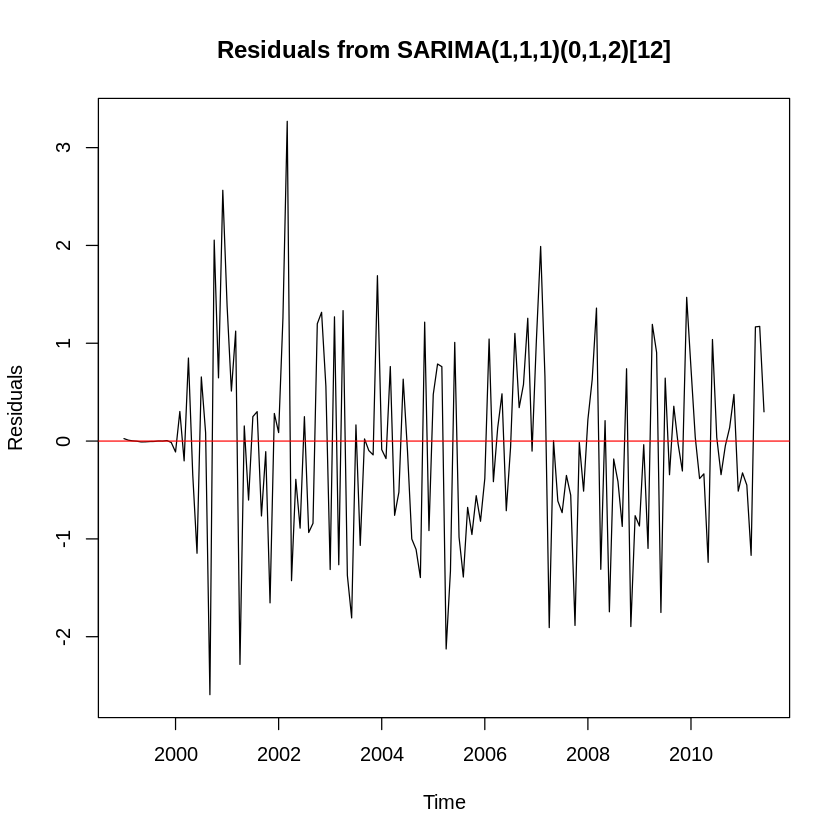

In [ ]:
par(mfrow = c(1,1))
plot(residuals, main = "Residuals from SARIMA(1,1,1)(0,1,2)[12]", ylab = "Residuals")
abline(h = 0, col = "red")



*   The residuals are centered around zero
*   The variance appears stable
*   No obvious patterns remain
*   The number of outliers is not excessive











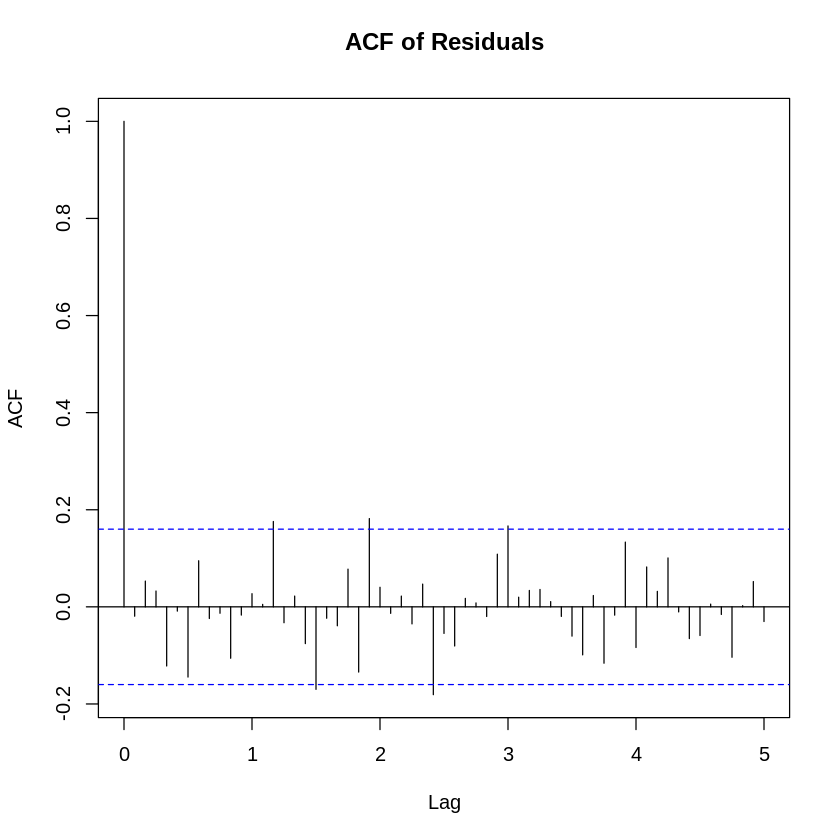

In [ ]:
acf(residuals, lag.max = 60, main = "ACF of Residuals")

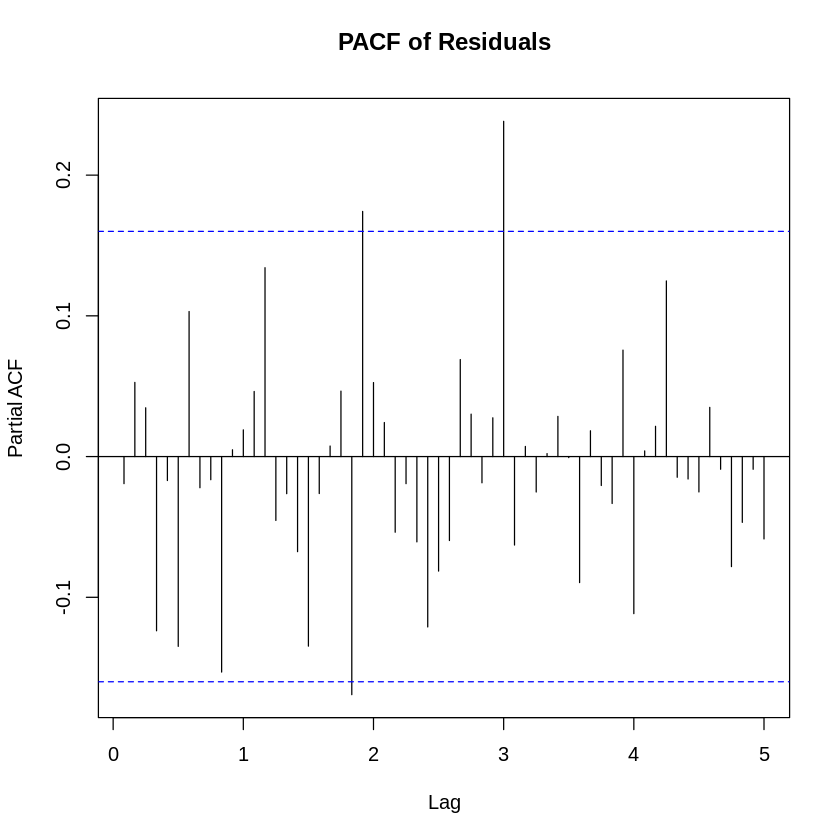

In [ ]:
pacf(residuals, lag.max = 60, main = "PACF of Residuals")


*   Both plots suggest that **SARIMA(1,1,1)(0,1,2)[12]** model has captured most of the correlation structure in the data
variation rather than systematic patterns
*   The few spikes that exceed the confidence bounds are likely due to random
*   The absence of significant spikes at seasonal lags suggests the seasonal component has been adequately modeled
*   The residuals appear to be behaving mostly like white noise, which is desirable



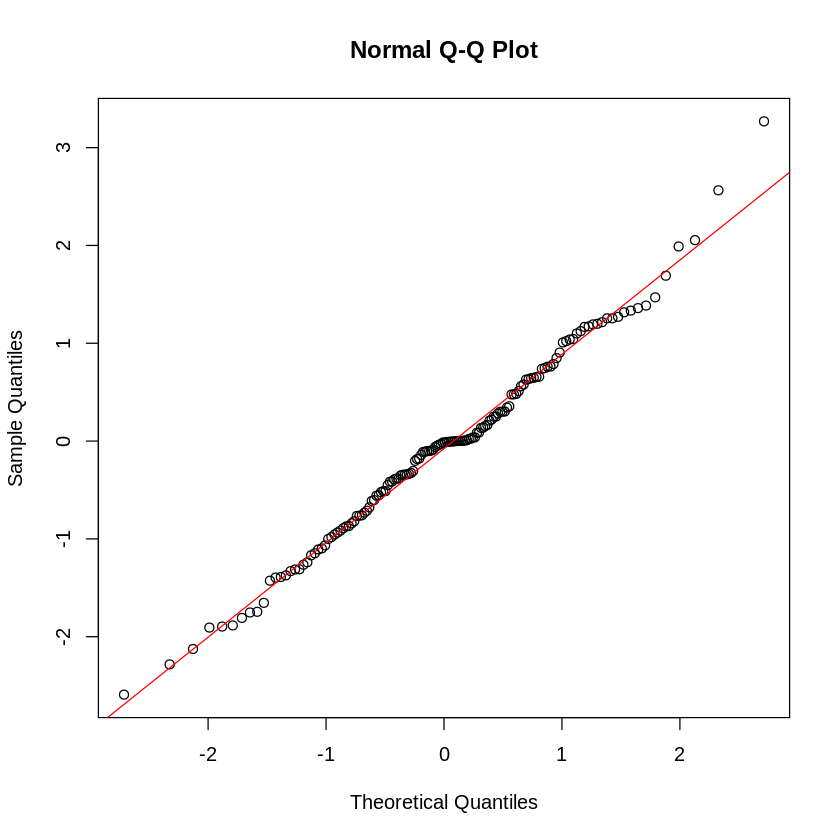

In [ ]:
qqnorm(residuals)
qqline(residuals, col = "red")

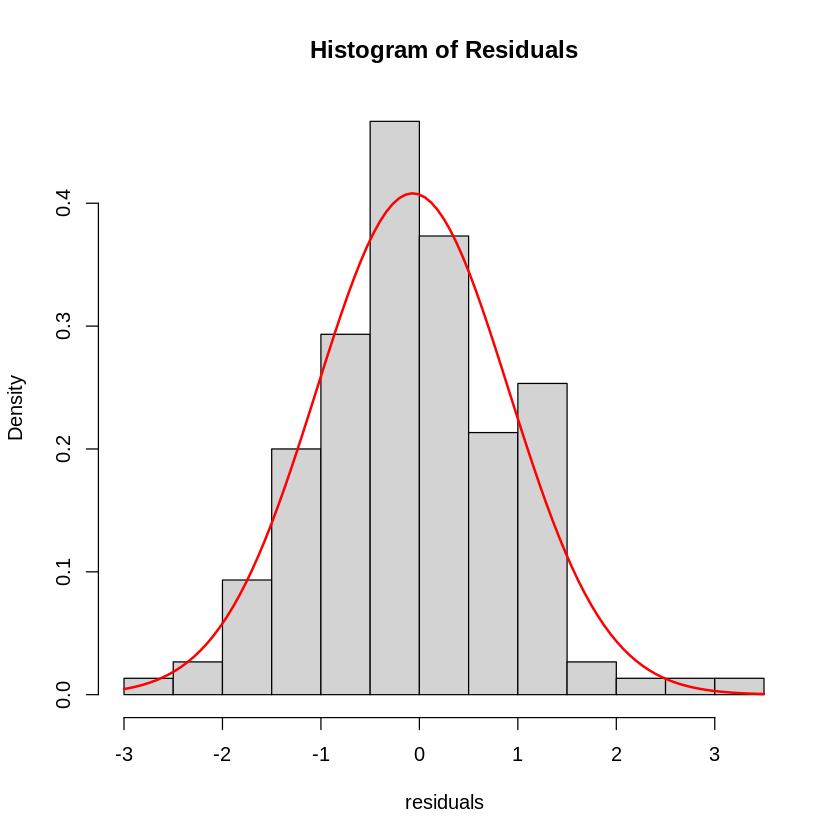

In [ ]:
hist(residuals, breaks = 20, freq = FALSE, main = "Histogram of Residuals")
curve(dnorm(x, mean = mean(residuals), sd = sd(residuals)),
      add = TRUE, col = "red", lwd = 2)



*   Both plots suggest that the residuals are approximately normally distributed
*   The minor deviations from normality are not severe enough to invalidate the model
*   The assumptions of normality for the **SARIMA(1,1,1)(0,1,2)[12]** model appear to be reasonably satisfied
*   No major concerns about the distribution of residuals that would compromise the model's validity



In [ ]:
shapiro_test <- shapiro.test(residuals)
print("Shapiro-Wilk Test for Normality:")
print(shapiro_test)

[1] "Shapiro-Wilk Test for Normality:"

	Shapiro-Wilk normality test

data:  residuals
W = 0.99062, p-value = 0.4217



Since p-value > 0.05 , we cannot reject the null Hypothesis H0 : Residuals follows normal distribution

**Conclusion**:  Residuals follows normal distribution

In [ ]:
lb_test_12 <- Box.test(residuals, lag = 12, type = "Ljung-Box")
lb_test_24 <- Box.test(residuals, lag = 24, type = "Ljung-Box")
lb_test_36 <- Box.test(residuals, lag = 36, type = "Ljung-Box")
lb_test_48 <- Box.test(residuals, lag = 48, type = "Ljung-Box")

print("Ljung-Box Test for Autocorrelation:")
print(lb_test_12)
print(lb_test_24)
print(lb_test_36)
print(lb_test_48)

[1] "Ljung-Box Test for Autocorrelation:"

	Box-Ljung test

data:  residuals
X-squared = 9.8385, df = 12, p-value = 0.6301


	Box-Ljung test

data:  residuals
X-squared = 32.121, df = 24, p-value = 0.124


	Box-Ljung test

data:  residuals
X-squared = 48.887, df = 36, p-value = 0.0743


	Box-Ljung test

data:  residuals
X-squared = 61.021, df = 48, p-value = 0.09826





All p-values are greater than the common significance level of 0.05
We fail to reject the null hypothesis of no autocorrelation at all lag levels
This suggests that:

**Conclusion:**

The residuals are not correlated .

The model has captured the correlation structure in the data well
There's no significant remaining pattern in the residuals

In [ ]:
binary_residuals <- factor(sign(residuals) > 0)
runs_test <- runs.test(binary_residuals)
print("Runs Test for Randomness:")
print(runs_test)

[1] "Runs Test for Randomness:"

	Runs Test

data:  binary_residuals
Standard Normal = -0.3879, p-value = 0.6981
alternative hypothesis: two.sided



p-value > 0.05 , We fail to reject the null Hypothesis of Indepedent Residuals.

**Conclusion**:

The residuals are indepedently distributed

**Summary**


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(0,1,2)[12]
Q* = 32.121, df = 20, p-value = 0.04203

Model df: 4.   Total lags used: 24



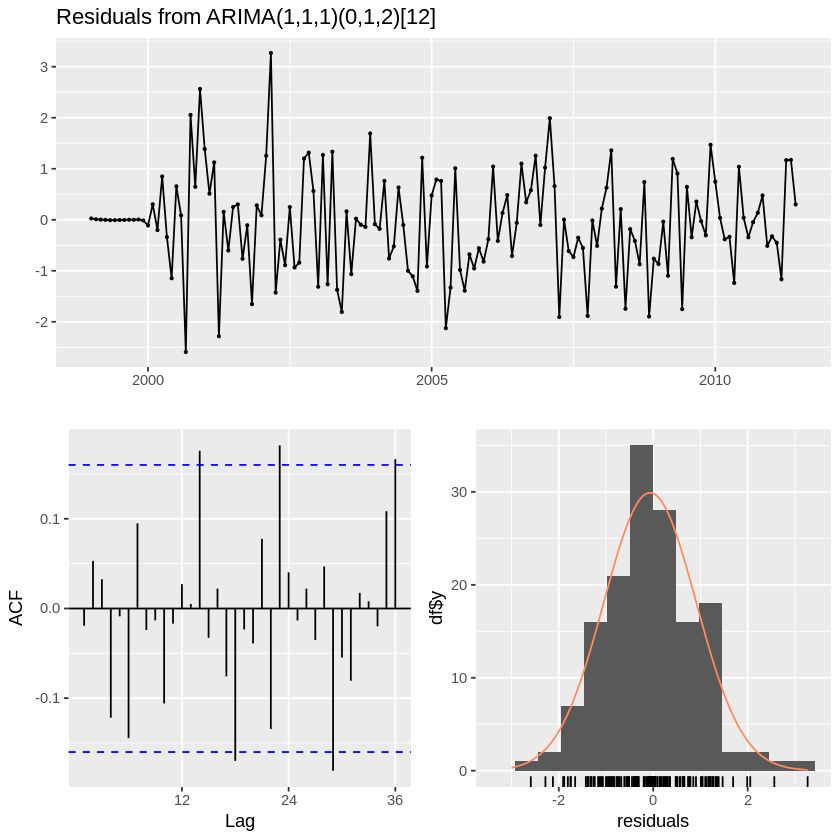

In [ ]:
checkresiduals(model)

## **Forecasting**

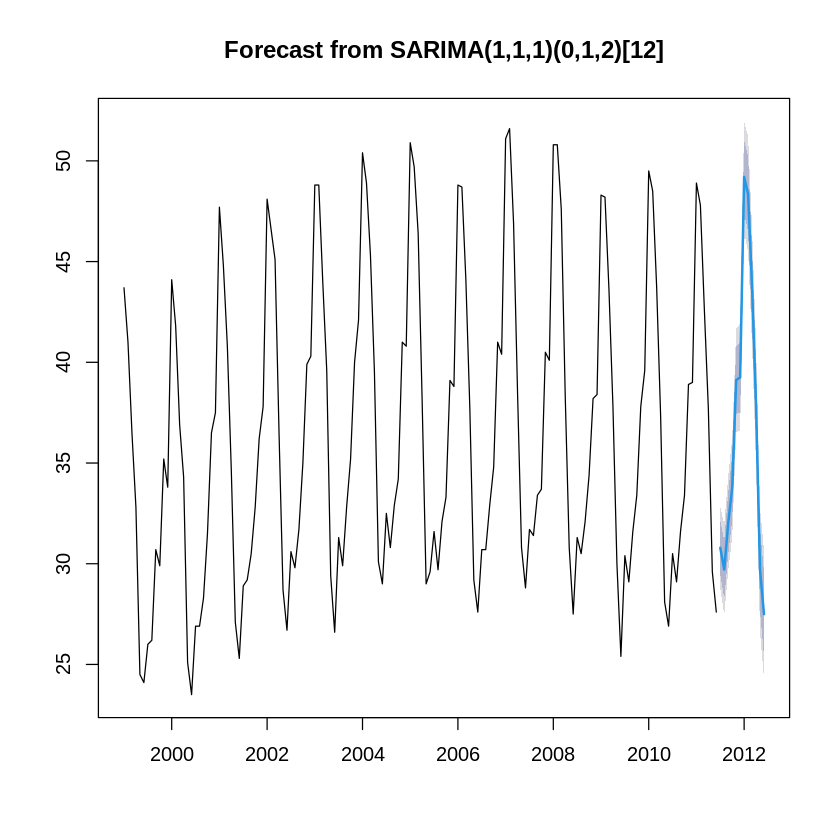

In [ ]:
forecast_values <- forecast(model, h = 12)
plot(forecast_values, main = "Forecast from SARIMA(1,1,1)(0,1,2)[12]")

**holdout validation** : We test the model now by training it on one part of the data and forecasting the other part , then comparing the errors obtained .

[1] "Forecast Accuracy Metrics:"
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.05625221 1.0207299 0.7785804 -0.3330483 2.198305 0.5920764
Test set     -0.06762496 0.6929478 0.5024349 -0.1288170 1.434438 0.3820797
                    ACF1 Theil's U
Training set -0.01096769        NA
Test set      0.04929691 0.1367572
[1] "Forecast Errors:"
             Jan         Feb         Mar         Apr         May         Jun
2010  0.81280905  0.14217650 -0.29514333 -0.25237413 -1.39784139  0.67836166
2011  0.01136603 -0.72137041 -1.76448268  0.22954538  0.23104783  1.06935497
             Jul         Aug         Sep         Oct         Nov         Dec
2010  0.10724485 -0.26614023 -0.11050716  0.07498086  0.55640211 -0.32267909
2011                                                                        


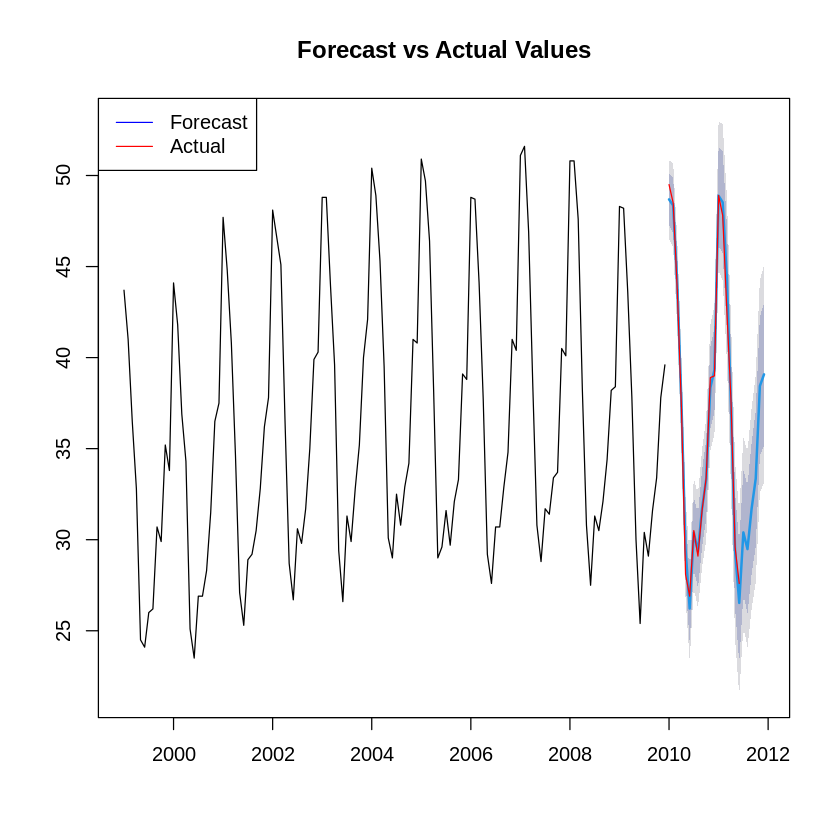

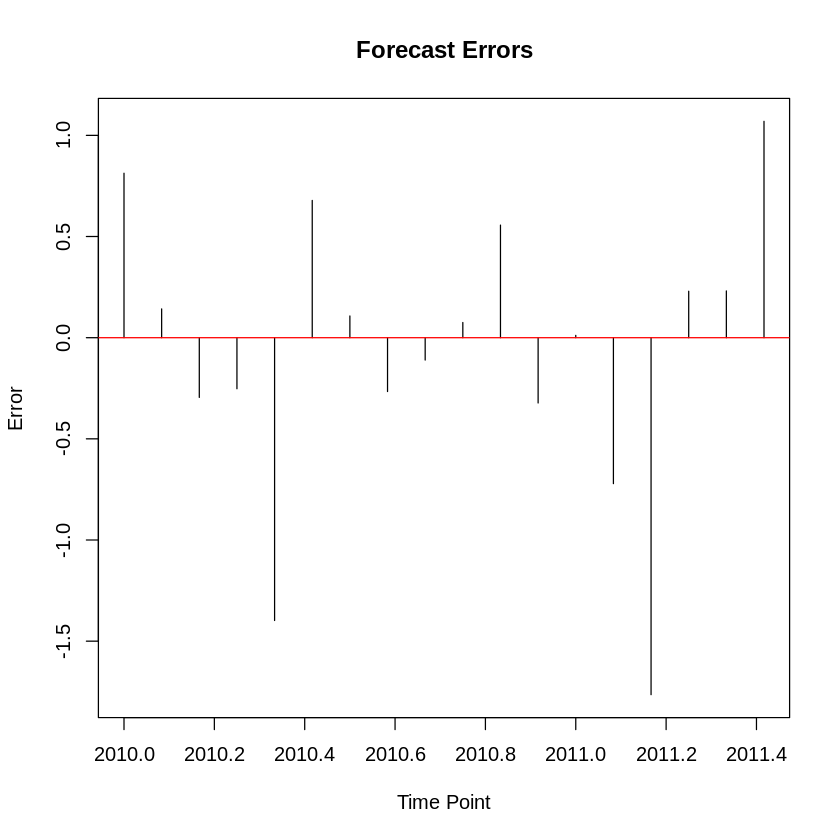

In [ ]:
n <- length(occupancy_ts)
n_test <- 24  # holding out 24 months (2 years) for testing
train_ts <- window(occupancy_ts, end = c(2009, 12))
test_ts <- window(occupancy_ts, start = c(2010, 1))


model_train <- Arima(train_ts,
                    order = c(1,1,1),
                    seasonal = list(order = c(0,1,2), period = 12),
                    include.mean = FALSE)

# make forecasts for the test period
forecasts <- forecast(model_train, h = n_test)

# compare forecasts with actual values
accuracy_metrics <- accuracy(forecasts, test_ts)
print("Forecast Accuracy Metrics:")
print(accuracy_metrics)

# plot the forecasts and actual values
plot(forecasts, main = "Forecast vs Actual Values")
lines(test_ts, col = "red")
legend("topleft", legend = c("Forecast", "Actual"),
       col = c("blue", "red"), lty = 1)

# calculate and print the forecast errors
forecast_errors <- test_ts - forecasts$mean
print("Forecast Errors:")
print(forecast_errors)

# plot forecast errors
plot(forecast_errors, type = "h",
     main = "Forecast Errors",
     ylab = "Error",
     xlab = "Time Point")
abline(h = 0, col = "red")

- Most errors are relatively small, falling between -1 and 1

- A few larger errors:

- Notable negative error around 2011.2 (approximately -1.76)

- Some positive spikes around 2010.0 and 2010.6 (around 0.8 and 0.7)

- No clear pattern in the errors, suggesting random fluctuations

**Conclusion :  The model performs well on both training and test sets , is performing very well for forecasting purposes, with particularly strong performance on the test set.**

## **Discussion**

This study undertook a comprehensive time series analysis of train occupancy rates using SARIMA modeling techniques. The analysis process involved several key stages, each presenting its own challenges and insights.

**Methodology and Process:**
Initially, we examined the raw data for patterns and characteristics, revealing strong seasonal components and non-stationarity. To address these features, we applied both regular and seasonal differencing to achieve stationarity. The model selection process involved careful analysis of ACF and PACF plots, leading to the identification of a SARIMA(1,1,1)(0,1,2)[12] model as the most appropriate specification.

**Key Findings:**
The selected model demonstrated robust performance in both fitting and forecasting:
The residual analysis showed well-behaved errors with normal distribution and no significant autocorrelation
The model achieved impressive forecasting accuracy with a MAPE of 1.43% on the test set
The seasonal patterns were effectively captured, as evidenced by the Ljung-Box test results
The model's predictive power was superior to naive forecasting methods, confirmed by a Theil's U statistic of 0.137
Challenges Encountered:
Several challenges emerged during the analysis:
1. Initial difficulty in determining the appropriate level of differencing needed to achieve stationarity
2. Complexity in interpreting seasonal patterns and their interaction with regular patterns
3. Balancing model complexity with forecasting accuracy when selecting SARIMA parameters
4. Ensuring the model could handle both short-term fluctuations and long-term trends
**Limitations and Considerations:**
While the model performs well, some limitations should be noted:
The analysis assumes that historical patterns will continue into the future
External factors affecting train occupancy (such as economic conditions or policy changes) are not explicitly incorporated
The model's performance might vary for different forecast horizons.

**Future Improvements:**

Potential enhancements for future analysis could include:
Incorporating external variables through SARIMAX modeling
Exploring alternative modeling approaches such as neural networks
Developing more sophisticated validation techniques
Including confidence intervals in the forecasting process.


Overall, the analysis successfully achieved its objectives of understanding and forecasting train occupancy patterns, providing valuable insights for operational planning and decision-making in railway systems.